# TIME SERIES PREDICTION STATEWISE -- KERALA, MAHARASHTRA (in depth analysis) and DELHI  - TILL 29th APRIL 2020

In [59]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import preprocessing
import mplcursors
import datetime
from pmdarima.arima import auto_arima
from fbprophet import Prophet
import statsmodels.api as sm
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from tslearn.svm import TimeSeriesSVR
from sklearn.preprocessing import MinMaxScaler
from numpy import concatenate

In [60]:
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras import Sequential

In [61]:
#https://machinelearningmastery.com/make-sample-forecasts-arima-python/
states =['Kerala', 'Delhi', 'Telengana', 'Haryana', 'Rajasthan', 'Uttar Pradesh',
 'Tamil Nadu', 'Ladakh', 'Karnataka', 'Maharashtra', 'Punjab',
 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry',
 'West Bengal', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh',
 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
 'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
 'Arunachal Pradesh', 'Tripura', 'Meghalaya']

In [62]:
df_state_recs =[]

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

for j in range(0, len(states)):
    stateName = states[j]
    df_per_State_features = pd.read_csv('features/' + stateName +'.csv')
    df_per_State_features = df_per_State_features.fillna(0)
    df_per_State_features["Active Cases"].replace({0:1}, inplace=True)
    df_state_recs.append(df_per_State_features)

# Analysis for Maharashtra

In [91]:
df_per_State_features = df_state_recs[9]
stateName = states[9]
data = df_per_State_features['Active Cases'].astype('int').values
    
daterange = df_per_State_features['Date'].values
no_Dates = len(daterange)

dateStart = daterange[0]
dateEnd = daterange[no_Dates - 1]


pred_index= pd.date_range(start=dateStart, end=dateEnd, freq='D')
activecases = pd.Series(data, index)
len_forecast = np.shape(df_per_State_features['Active Cases'])[0]
print(dateStart, dateEnd)

2020-03-09 2020-04-29


(737485.0, 737546.0)

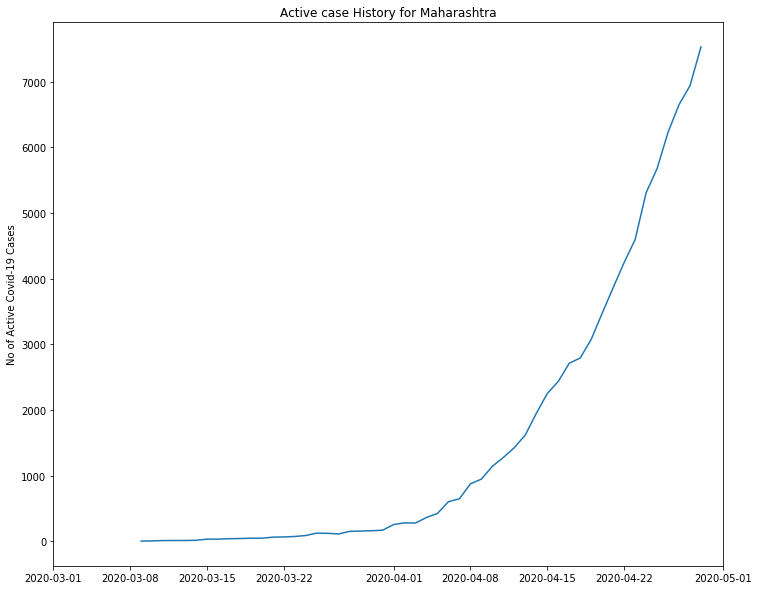

In [92]:
f, ax = plt.subplots(1,1 , figsize=(12,10))
plt.plot(activecases)
ax.set_ylabel("No of Active Covid-19 Cases")
title = 'Active case History for ' + stateName
ax.set_title(title)
ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 5, 1)])


# Deep Learning based LSTM prediction for Active Cases using Input Features Cured/Discharged/Migrated', 'Death', 'Total Confirmed cases', 'LiteracyRate', 'PopulationDensity', 'ElderlyRate','DistrictsEffected', 'NoRedZones', 'NoOrangeZones', 'NoGreenZones, InternationalAirports,IntAirportPassenger,StateHospitals,StateHospitalBeds,StateHospitalICUs,StateHospitalVentilators for State Maharashtra

In [93]:
df_per_State_features = df_state_recs[9]
df_per_State_features.head()

,Unnamed: 0,index,Date,Name of State / UT,Cured/Discharged/Migrated,Death,Total Confirmed cases,Active Cases,LiteracyRate,PopulationDensity,...,StateHospitals,StateHospitalBeds,StateHospitalICUs,StateHospitalVentilators,Rate_per_3_days,Rate_per_5_days,Rate_per_7_days,Rate_per_15_days,Rate_per_21_days,is_curve_flattened
0,0,76,2020-03-09,Maharashtra,0,0,2,2,82.3,365,...,3203,231739,11587,5793,0.00,0.0,0.0,0.0,0.0,0
1,1,88,2020-03-10,Maharashtra,0,0,5,5,82.3,365,...,3203,231739,11587,5793,0.00,0.0,0.0,0.0,0.0,0
2,2,100,2020-03-11,Maharashtra,0,0,10,10,82.3,365,...,3203,231739,11587,5793,0.00,0.0,0.0,0.0,0.0,0
3,3,113,2020-03-12,Maharashtra,0,0,11,11,82.3,365,...,3203,231739,11587,5793,81.82,0.0,0.0,0.0,0.0,0
4,4,126,2020-03-13,Maharashtra,0,0,11,11,82.3,365,...,3203,231739,11587,5793,54.55,0.0,0.0,0.0,0.0,0


In [94]:
df_per_State_features = df_per_State_features[['Cured/Discharged/Migrated', 'Death', 'Total Confirmed cases', 'LiteracyRate', 'PopulationDensity', 'ElderlyRate',
       'DistrictsEffected', 'NoRedZones', 'NoOrangeZones', 'NoGreenZones', 'InternationalAirports', 'IntAirportPassenger', 'StateHospitals','StateHospitalBeds','StateHospitalICUs', 'StateHospitalVentilators', 'Active Cases']]

In [95]:
df_per_State_features.head()

,Cured/Discharged/Migrated,Death,Total Confirmed cases,LiteracyRate,PopulationDensity,ElderlyRate,DistrictsEffected,NoRedZones,NoOrangeZones,NoGreenZones,InternationalAirports,IntAirportPassenger,StateHospitals,StateHospitalBeds,StateHospitalICUs,StateHospitalVentilators,Active Cases
0,0,0,2,82.3,365,9.9,32,14,16,6,3,67.0,3203,231739,11587,5793,2
1,0,0,5,82.3,365,9.9,32,14,16,6,3,67.0,3203,231739,11587,5793,5
2,0,0,10,82.3,365,9.9,32,14,16,6,3,67.0,3203,231739,11587,5793,10
3,0,0,11,82.3,365,9.9,32,14,16,6,3,67.0,3203,231739,11587,5793,11
4,0,0,11,82.3,365,9.9,32,14,16,6,3,67.0,3203,231739,11587,5793,11


In [96]:

# # convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [97]:
no_features = df_per_State_features.shape[1] - 1 #(subtracting the predicted output)

values = df_per_State_features.values
# ensure all data is float
values = values.astype('float32')
print(np.shape(values)[0])
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
print(np.shape(reframed))
reframed.drop(reframed.columns[[18, 19, 20, 21,22,23,24,25,26,27,28,29,30, 31, 32, 33]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
split_factor = int(df_per_State_features.shape[0]*0.65)
train = values[:split_factor, :]
test = values[split_factor:, :]

print(np.shape(train))
print(np.shape(test))

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

print(train_X.shape[1], train_X.shape[2])

52
(51, 34)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.0        0.0   0.000000        0.0        0.0        0.0   
2        0.0        0.0   0.000322        0.0        0.0        0.0   
3        0.0        0.0   0.000859        0.0        0.0        0.0   
4        0.0        0.0   0.000966        0.0        0.0        0.0   
5        0.0        0.0   0.000966        0.0        0.0        0.0   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1        0.0        0.0        0.0         0.0         0.0         0.0   
2        0.0        0.0        0.0         0.0         0.0         0.0   
3        0.0        0.0        0.0         0.0         0.0         0.0   
4        0.0        0.0        0.0         0.0         0.0         0.0   
5        0.0        0.0        0.0         0.0         0.0         0.0   

   var13(t-1)  var14(t-1)  var15(t-1)  var16(t-1)  var17(t-1)  var1(t)  
1         0.0         0.0         0.0      

In [98]:
# design network
model = Sequential()

model.add(LSTM(units=50, return_sequences= True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=300, batch_size=64, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)

Train on 33 samples, validate on 18 samples
Epoch 1/300
33/33 - 5s - loss: 0.0206 - val_loss: 0.4478
Epoch 2/300
33/33 - 0s - loss: 0.0206 - val_loss: 0.4456
Epoch 3/300
33/33 - 0s - loss: 0.0206 - val_loss: 0.4443
Epoch 4/300
33/33 - 0s - loss: 0.0206 - val_loss: 0.4435
Epoch 5/300
33/33 - 0s - loss: 0.0206 - val_loss: 0.4432
Epoch 6/300
33/33 - 0s - loss: 0.0205 - val_loss: 0.4432
Epoch 7/300
33/33 - 0s - loss: 0.0205 - val_loss: 0.4435
Epoch 8/300
33/33 - 0s - loss: 0.0204 - val_loss: 0.4440
Epoch 9/300
33/33 - 0s - loss: 0.0203 - val_loss: 0.4447
Epoch 10/300
33/33 - 0s - loss: 0.0202 - val_loss: 0.4455
Epoch 11/300
33/33 - 0s - loss: 0.0210 - val_loss: 0.4431
Epoch 12/300
33/33 - 0s - loss: 0.0201 - val_loss: 0.4409
Epoch 13/300
33/33 - 0s - loss: 0.0201 - val_loss: 0.4387
Epoch 14/300
33/33 - 0s - loss: 0.0201 - val_loss: 0.4366
Epoch 15/300
33/33 - 0s - loss: 0.0201 - val_loss: 0.4345
Epoch 16/300
33/33 - 0s - loss: 0.0201 - val_loss: 0.4324
Epoch 17/300
33/33 - 0s - loss: 0.020

Epoch 141/300
33/33 - 0s - loss: 0.0043 - val_loss: 0.0815
Epoch 142/300
33/33 - 0s - loss: 0.0043 - val_loss: 0.0815
Epoch 143/300
33/33 - 0s - loss: 0.0044 - val_loss: 0.0813
Epoch 144/300
33/33 - 0s - loss: 0.0043 - val_loss: 0.0808
Epoch 145/300
33/33 - 0s - loss: 0.0043 - val_loss: 0.0811
Epoch 146/300
33/33 - 0s - loss: 0.0043 - val_loss: 0.0819
Epoch 147/300
33/33 - 0s - loss: 0.0043 - val_loss: 0.0824
Epoch 148/300
33/33 - 0s - loss: 0.0043 - val_loss: 0.0826
Epoch 149/300
33/33 - 0s - loss: 0.0043 - val_loss: 0.0826
Epoch 150/300
33/33 - 0s - loss: 0.0042 - val_loss: 0.0823
Epoch 151/300
33/33 - 0s - loss: 0.0044 - val_loss: 0.0816
Epoch 152/300
33/33 - 0s - loss: 0.0042 - val_loss: 0.0807
Epoch 153/300
33/33 - 0s - loss: 0.0042 - val_loss: 0.0796
Epoch 154/300
33/33 - 0s - loss: 0.0043 - val_loss: 0.0784
Epoch 155/300
33/33 - 0s - loss: 0.0042 - val_loss: 0.0770
Epoch 156/300
33/33 - 0s - loss: 0.0042 - val_loss: 0.0765
Epoch 157/300
33/33 - 0s - loss: 0.0043 - val_loss: 0.07

Epoch 280/300
33/33 - 0s - loss: 0.0032 - val_loss: 0.0544
Epoch 281/300
33/33 - 0s - loss: 0.0032 - val_loss: 0.0555
Epoch 282/300
33/33 - 0s - loss: 0.0032 - val_loss: 0.0566
Epoch 283/300
33/33 - 0s - loss: 0.0032 - val_loss: 0.0580
Epoch 284/300
33/33 - 0s - loss: 0.0032 - val_loss: 0.0592
Epoch 285/300
33/33 - 0s - loss: 0.0032 - val_loss: 0.0605
Epoch 286/300
33/33 - 0s - loss: 0.0032 - val_loss: 0.0620
Epoch 287/300
33/33 - 0s - loss: 0.0032 - val_loss: 0.0640
Epoch 288/300
33/33 - 0s - loss: 0.0031 - val_loss: 0.0662
Epoch 289/300
33/33 - 0s - loss: 0.0032 - val_loss: 0.0667
Epoch 290/300
33/33 - 0s - loss: 0.0032 - val_loss: 0.0679
Epoch 291/300
33/33 - 0s - loss: 0.0032 - val_loss: 0.0697
Epoch 292/300
33/33 - 0s - loss: 0.0031 - val_loss: 0.0698
Epoch 293/300
33/33 - 0s - loss: 0.0031 - val_loss: 0.0703
Epoch 294/300
33/33 - 0s - loss: 0.0031 - val_loss: 0.0713
Epoch 295/300
33/33 - 0s - loss: 0.0031 - val_loss: 0.0726
Epoch 296/300
33/33 - 0s - loss: 0.0032 - val_loss: 0.07

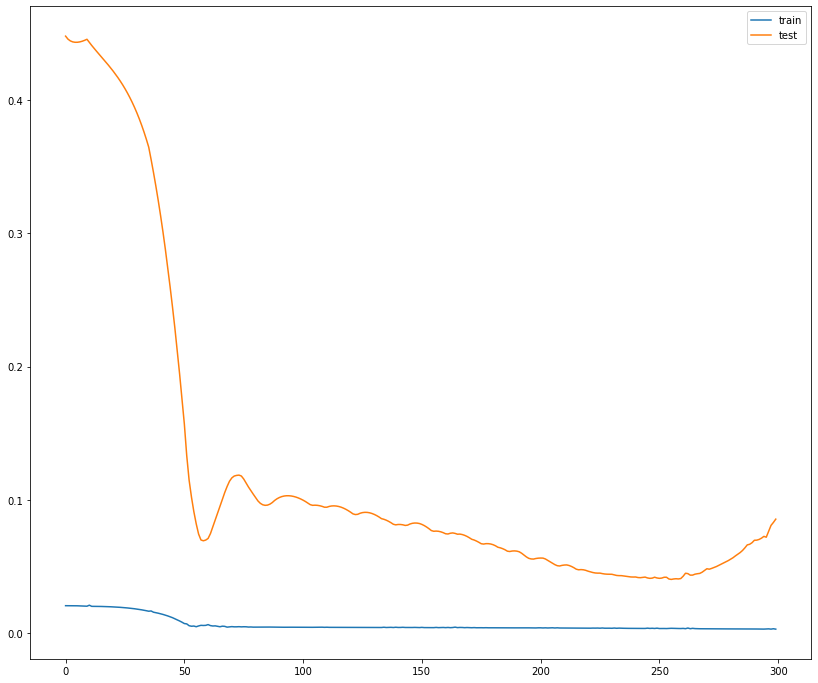

In [99]:
# plot train vs validation loss
plt.figure(figsize=(14,12))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [100]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# make a prediction
y_predict = model.predict(test_X)
print(y_predict)
rmse = np.sqrt(mean_squared_error(test_y, y_predict))
print(rmse)

(33, 1, 17) (33,) (18, 1, 17) (18,)
[[0.17069797]
 [0.19388169]
 [0.21509841]
 [0.23614113]
 [0.27107283]
 [0.30209318]
 [0.31657702]
 [0.3413439 ]
 [0.37575802]
 [0.4823567 ]
 [0.5407922 ]
 [0.66110945]
 [0.7279316 ]
 [0.79390967]
 [0.8188405 ]
 [1.0053294 ]
 [1.0333126 ]
 [1.1918602 ]]
0.10496101


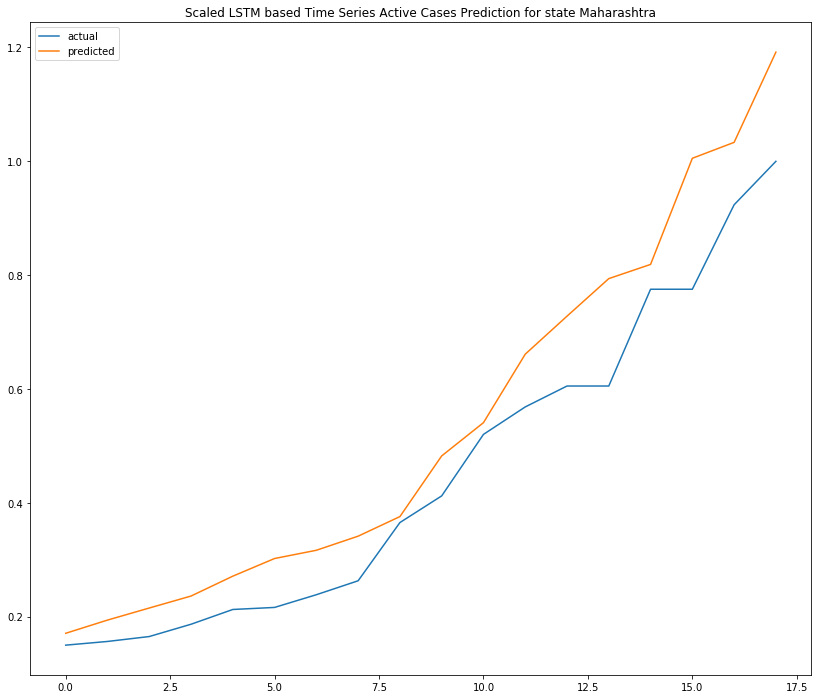

In [101]:
plt.figure(figsize=(14,12))
plt.plot(test_y, label='actual')
plt.plot(y_predict, label='predicted')
plt.title('Scaled LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()

# Invert Scaling to get actual predicted values and compare with Actual Number of Predicted Cases

In [102]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

inv_y_predict = concatenate((y_predict, test_X[:, -(no_features):]), axis=1)

inv_y_predict = scaler.inverse_transform(inv_y_predict)
inv_y_predict = inv_y_predict[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_predict))
print('Test RMSE: %.3f' % rmse)

print(inv_y)

Test RMSE: 145.686
[ 207.99998  217.       229.       259.       295.       300.
  331.       365.       507.       572.       722.       789.
  840.       840.      1076.      1076.      1282.      1388.     ]


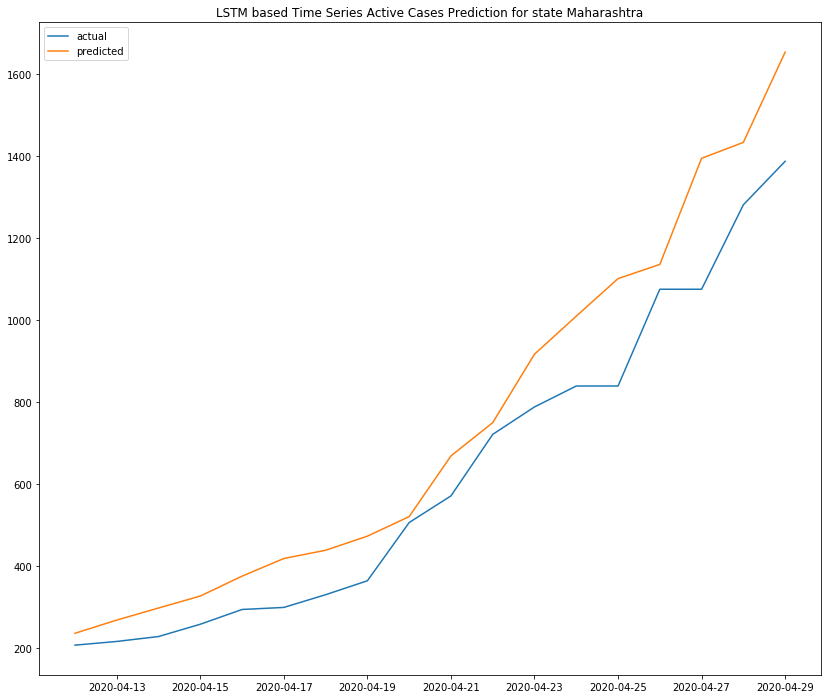

In [103]:
# plot actual vs predicted
pred_len = len(inv_y_predict)
dateEnd = daterange[split_factor+1]
pred_index= pd.date_range(start=dateEnd, periods=pred_len, freq='D')

inv_y_actual =  pd.Series(inv_y, pred_index)
inv_y_predicted =  pd.Series(inv_y_predict, pred_index)

plt.figure(figsize=(14,12))
plt.plot(inv_y_actual, label='actual')
plt.plot(inv_y_predicted, label='predicted')
plt.title('LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()

# Deep Learning based LSTM prediction for Active Cases using Input Features Cured/Discharged/Migrated', 'Death', 'Total Confirmed cases', 'LiteracyRate'

In [76]:
#with Limited set of features , the last few features 'LiteracyRate', 'PopulationDensity', 'ElderlyRate' are constants over time
df_per_State_features_lstm = df_state_recs[9]
df_per_State_features_lstm = df_per_State_features_lstm[['Cured/Discharged/Migrated', 'Death', 'Total Confirmed cases', 'LiteracyRate', 'PopulationDensity', 'ElderlyRate', 'Active Cases']]

In [104]:
no_features = df_per_State_features_lstm.shape[1] - 1 #(subtracting the predicted output)

values = df_per_State_features_lstm.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[18, 19, 20, 21,22,23,24,25,26,27,28,29,30, 31, 32, 33]], axis=1, inplace=True)
reframed.drop(reframed.columns[[8, 9, 10, 11, 12, 13]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
split_factor = int(df_per_State_features_lstm.shape[0]*0.65)
train = values[:split_factor, :]
test = values[split_factor:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


In [105]:
# design network
model = Sequential()

model.add(LSTM(units=50, return_sequences= True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=225, batch_size=64, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)

Train on 33 samples, validate on 18 samples
Epoch 1/225
33/33 - 5s - loss: 0.0206 - val_loss: 0.4475
Epoch 2/225
33/33 - 0s - loss: 0.0206 - val_loss: 0.4453
Epoch 3/225
33/33 - 0s - loss: 0.0206 - val_loss: 0.4440
Epoch 4/225
33/33 - 0s - loss: 0.0206 - val_loss: 0.4434
Epoch 5/225
33/33 - 0s - loss: 0.0206 - val_loss: 0.4432
Epoch 6/225
33/33 - 0s - loss: 0.0206 - val_loss: 0.4433
Epoch 7/225
33/33 - 0s - loss: 0.0205 - val_loss: 0.4438
Epoch 8/225
33/33 - 0s - loss: 0.0204 - val_loss: 0.4444
Epoch 9/225
33/33 - 0s - loss: 0.0204 - val_loss: 0.4452
Epoch 10/225
33/33 - 0s - loss: 0.0203 - val_loss: 0.4462
Epoch 11/225
33/33 - 0s - loss: 0.0211 - val_loss: 0.4439
Epoch 12/225
33/33 - 0s - loss: 0.0202 - val_loss: 0.4417
Epoch 13/225
33/33 - 0s - loss: 0.0202 - val_loss: 0.4396
Epoch 14/225
33/33 - 0s - loss: 0.0202 - val_loss: 0.4375
Epoch 15/225
33/33 - 0s - loss: 0.0202 - val_loss: 0.4355
Epoch 16/225
33/33 - 0s - loss: 0.0201 - val_loss: 0.4335
Epoch 17/225
33/33 - 0s - loss: 0.020

Epoch 141/225
33/33 - 0s - loss: 0.0042 - val_loss: 0.0784
Epoch 142/225
33/33 - 0s - loss: 0.0044 - val_loss: 0.0785
Epoch 143/225
33/33 - 0s - loss: 0.0046 - val_loss: 0.0782
Epoch 144/225
33/33 - 0s - loss: 0.0042 - val_loss: 0.0776
Epoch 145/225
33/33 - 0s - loss: 0.0044 - val_loss: 0.0769
Epoch 146/225
33/33 - 0s - loss: 0.0044 - val_loss: 0.0769
Epoch 147/225
33/33 - 0s - loss: 0.0042 - val_loss: 0.0766
Epoch 148/225
33/33 - 0s - loss: 0.0045 - val_loss: 0.0760
Epoch 149/225
33/33 - 0s - loss: 0.0043 - val_loss: 0.0752
Epoch 150/225
33/33 - 0s - loss: 0.0041 - val_loss: 0.0742
Epoch 151/225
33/33 - 0s - loss: 0.0046 - val_loss: 0.0740
Epoch 152/225
33/33 - 0s - loss: 0.0043 - val_loss: 0.0745
Epoch 153/225
33/33 - 0s - loss: 0.0042 - val_loss: 0.0746
Epoch 154/225
33/33 - 0s - loss: 0.0047 - val_loss: 0.0741
Epoch 155/225
33/33 - 0s - loss: 0.0042 - val_loss: 0.0733
Epoch 156/225
33/33 - 0s - loss: 0.0042 - val_loss: 0.0723
Epoch 157/225
33/33 - 0s - loss: 0.0044 - val_loss: 0.07

In [106]:
# make a prediction
y_predict = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


inv_y_predict = concatenate((y_predict, test_X[:, -(no_features):]), axis=1)

inv_y_predict = scaler.inverse_transform(inv_y_predict)
inv_y_predict = inv_y_predict[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_predict))
print('Test RMSE: %.3f' % rmse)



(33, 1, 7) (33,) (18, 7) (18,)
Test RMSE: 69.086


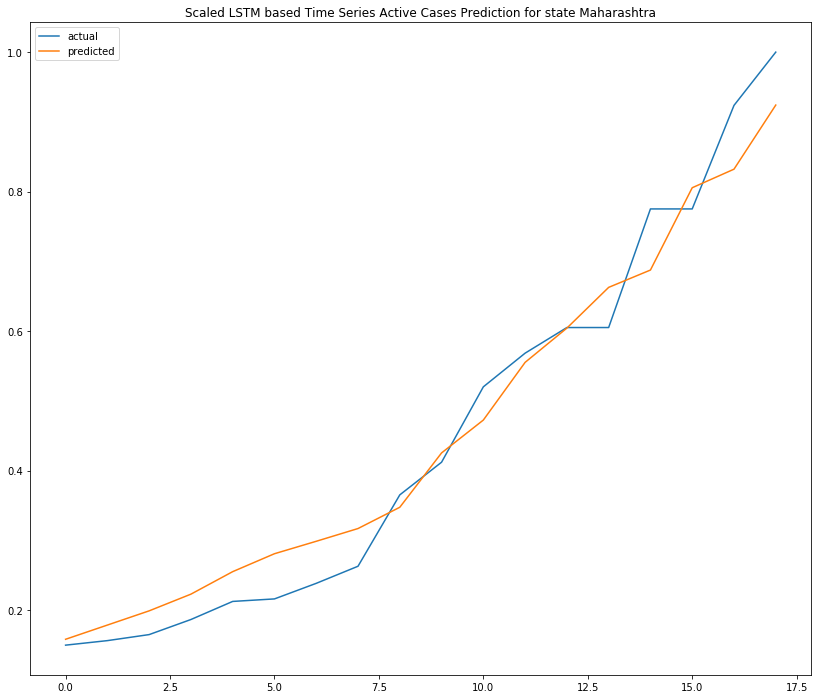

Test RMSE: 0.050


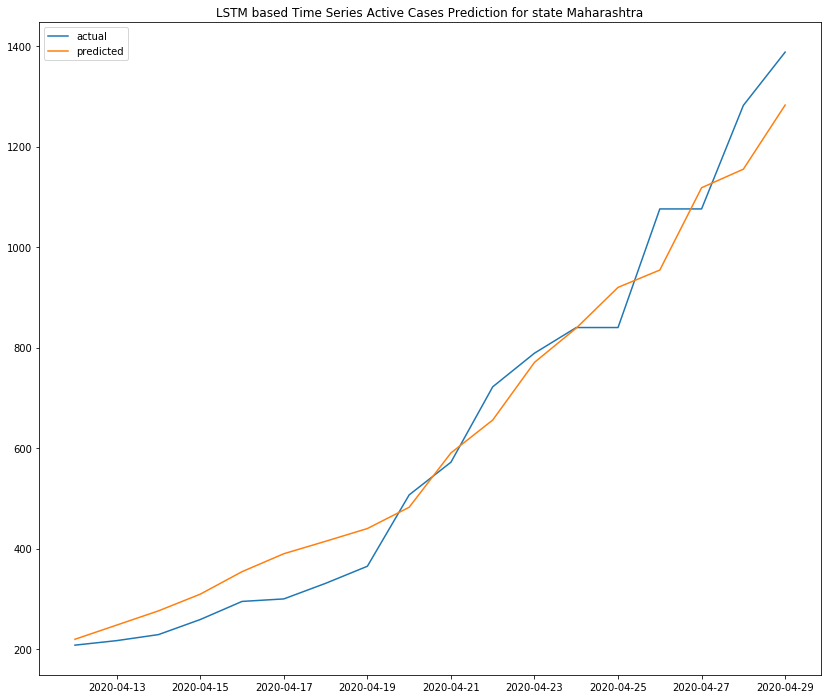

In [107]:
plt.figure(figsize=(14,12))
plt.plot(test_y, label='actual')
plt.plot(y_predict, label='predicted')
plt.title('Scaled LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()
rmse = np.sqrt(mean_squared_error(test_y, y_predict))
print('Test RMSE: %.3f' % rmse)

# plot actual vs predicted
pred_len = len(inv_y_predict)
dateEnd = daterange[split_factor+1]
pred_index= pd.date_range(start=dateEnd, periods=pred_len, freq='D')

inv_y_actual =  pd.Series(inv_y, pred_index)
inv_y_predicted =  pd.Series(inv_y_predict, pred_index)

plt.figure(figsize=(14,12))
plt.plot(inv_y_actual, label='actual')
plt.plot(inv_y_predicted, label='predicted')
plt.title('LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()

# Adding Smoothening factors (Rolling Window width 3) with limited Input features

52
(50, 22)
36
(36, 12)
(14, 12)
(36, 11) (36,) (14, 11) (14,)
(36, 1, 11) (36,) (14, 1, 11) (14,)
1 11
Train on 36 samples, validate on 14 samples
Epoch 1/2000
36/36 - 6s - loss: 0.0372 - val_loss: 0.5292
Epoch 2/2000
36/36 - 0s - loss: 0.0366 - val_loss: 0.5252
Epoch 3/2000
36/36 - 0s - loss: 0.0361 - val_loss: 0.5214
Epoch 4/2000
36/36 - 0s - loss: 0.0357 - val_loss: 0.5177
Epoch 5/2000
36/36 - 0s - loss: 0.0355 - val_loss: 0.5141
Epoch 6/2000
36/36 - 0s - loss: 0.0352 - val_loss: 0.5106
Epoch 7/2000
36/36 - 0s - loss: 0.0351 - val_loss: 0.5078
Epoch 8/2000
36/36 - 0s - loss: 0.0352 - val_loss: 0.5055
Epoch 9/2000
36/36 - 0s - loss: 0.0352 - val_loss: 0.5037
Epoch 10/2000
36/36 - 0s - loss: 0.0352 - val_loss: 0.5023
Epoch 11/2000
36/36 - 0s - loss: 0.0351 - val_loss: 0.5013
Epoch 12/2000
36/36 - 0s - loss: 0.0350 - val_loss: 0.5005
Epoch 13/2000
36/36 - 0s - loss: 0.0348 - val_loss: 0.4999
Epoch 14/2000
36/36 - 0s - loss: 0.0346 - val_loss: 0.4995
Epoch 15/2000
36/36 - 0s - loss: 0.

Epoch 137/2000
36/36 - 0s - loss: 0.0051 - val_loss: 0.1576
Epoch 138/2000
36/36 - 0s - loss: 0.0051 - val_loss: 0.1584
Epoch 139/2000
36/36 - 0s - loss: 0.0051 - val_loss: 0.1589
Epoch 140/2000
36/36 - 0s - loss: 0.0051 - val_loss: 0.1593
Epoch 141/2000
36/36 - 0s - loss: 0.0051 - val_loss: 0.1595
Epoch 142/2000
36/36 - 0s - loss: 0.0052 - val_loss: 0.1602
Epoch 143/2000
36/36 - 0s - loss: 0.0051 - val_loss: 0.1608
Epoch 144/2000
36/36 - 0s - loss: 0.0051 - val_loss: 0.1612
Epoch 145/2000
36/36 - 0s - loss: 0.0051 - val_loss: 0.1615
Epoch 146/2000
36/36 - 0s - loss: 0.0051 - val_loss: 0.1621
Epoch 147/2000
36/36 - 0s - loss: 0.0050 - val_loss: 0.1626
Epoch 148/2000
36/36 - 0s - loss: 0.0050 - val_loss: 0.1629
Epoch 149/2000
36/36 - 0s - loss: 0.0050 - val_loss: 0.1632
Epoch 150/2000
36/36 - 0s - loss: 0.0051 - val_loss: 0.1639
Epoch 151/2000
36/36 - 0s - loss: 0.0050 - val_loss: 0.1643
Epoch 152/2000
36/36 - 0s - loss: 0.0050 - val_loss: 0.1646
Epoch 153/2000
36/36 - 0s - loss: 0.0050

Epoch 274/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.1964
Epoch 275/2000
36/36 - 0s - loss: 0.0045 - val_loss: 0.1965
Epoch 276/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.1965
Epoch 277/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.1969
Epoch 278/2000
36/36 - 0s - loss: 0.0045 - val_loss: 0.1985
Epoch 279/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.1981
Epoch 280/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.1974
Epoch 281/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.1968
Epoch 282/2000
36/36 - 0s - loss: 0.0045 - val_loss: 0.1974
Epoch 283/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.1980
Epoch 284/2000
36/36 - 0s - loss: 0.0045 - val_loss: 0.1982
Epoch 285/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.1982
Epoch 286/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.1989
Epoch 287/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.2007
Epoch 288/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.2003
Epoch 289/2000
36/36 - 0s - loss: 0.0045 - val_loss: 0.1979
Epoch 290/2000
36/36 - 0s - loss: 0.0043

Epoch 411/2000
36/36 - 0s - loss: 0.0043 - val_loss: 0.1991
Epoch 412/2000
36/36 - 0s - loss: 0.0041 - val_loss: 0.1992
Epoch 413/2000
36/36 - 0s - loss: 0.0042 - val_loss: 0.1966
Epoch 414/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.1967
Epoch 415/2000
36/36 - 0s - loss: 0.0042 - val_loss: 0.2001
Epoch 416/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.2002
Epoch 417/2000
36/36 - 0s - loss: 0.0042 - val_loss: 0.1974
Epoch 418/2000
36/36 - 0s - loss: 0.0043 - val_loss: 0.1983
Epoch 419/2000
36/36 - 0s - loss: 0.0041 - val_loss: 0.2006
Epoch 420/2000
36/36 - 0s - loss: 0.0046 - val_loss: 0.1990
Epoch 421/2000
36/36 - 0s - loss: 0.0042 - val_loss: 0.1949
Epoch 422/2000
36/36 - 0s - loss: 0.0046 - val_loss: 0.1946
Epoch 423/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.1975
Epoch 424/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.1973
Epoch 425/2000
36/36 - 0s - loss: 0.0045 - val_loss: 0.1941
Epoch 426/2000
36/36 - 0s - loss: 0.0042 - val_loss: 0.1940
Epoch 427/2000
36/36 - 0s - loss: 0.0045

Epoch 548/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.1988
Epoch 549/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2002
Epoch 550/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2012
Epoch 551/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2019
Epoch 552/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2024
Epoch 553/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2009
Epoch 554/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.1994
Epoch 555/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.1982
Epoch 556/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.1969
Epoch 557/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.1966
Epoch 558/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.1984
Epoch 559/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.1997
Epoch 560/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2016
Epoch 561/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2027
Epoch 562/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2016
Epoch 563/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2008
Epoch 564/2000
36/36 - 0s - loss: 0.0040

Epoch 685/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2046
Epoch 686/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2054
Epoch 687/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2053
Epoch 688/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2044
Epoch 689/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2044
Epoch 690/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2051
Epoch 691/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2049
Epoch 692/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2041
Epoch 693/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2058
Epoch 694/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2073
Epoch 695/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2080
Epoch 696/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2083
Epoch 697/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2088
Epoch 698/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2089
Epoch 699/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2085
Epoch 700/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2078
Epoch 701/2000
36/36 - 0s - loss: 0.0039

Epoch 822/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2132
Epoch 823/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2112
Epoch 824/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2121
Epoch 825/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2144
Epoch 826/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2154
Epoch 827/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2164
Epoch 828/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2181
Epoch 829/2000
36/36 - 0s - loss: 0.0041 - val_loss: 0.2183
Epoch 830/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2177
Epoch 831/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2177
Epoch 832/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2175
Epoch 833/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2165
Epoch 834/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2153
Epoch 835/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2150
Epoch 836/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2144
Epoch 837/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2143
Epoch 838/2000
36/36 - 0s - loss: 0.0039

Epoch 959/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2219
Epoch 960/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2228
Epoch 961/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2233
Epoch 962/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2238
Epoch 963/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2242
Epoch 964/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2243
Epoch 965/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2240
Epoch 966/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2237
Epoch 967/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2235
Epoch 968/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2231
Epoch 969/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2225
Epoch 970/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2226
Epoch 971/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2223
Epoch 972/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2217
Epoch 973/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2218
Epoch 974/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2216
Epoch 975/2000
36/36 - 0s - loss: 0.0038

Epoch 1094/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2318
Epoch 1095/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2303
Epoch 1096/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2281
Epoch 1097/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2265
Epoch 1098/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2260
Epoch 1099/2000
36/36 - 0s - loss: 0.0041 - val_loss: 0.2244
Epoch 1100/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2249
Epoch 1101/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2280
Epoch 1102/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2304
Epoch 1103/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2317
Epoch 1104/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2322
Epoch 1105/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2332
Epoch 1106/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2335
Epoch 1107/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2326
Epoch 1108/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2319
Epoch 1109/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2317
Epoch 1110/2000
36/36 - 

Epoch 1229/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2306
Epoch 1230/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.2323
Epoch 1231/2000
36/36 - 0s - loss: 0.0042 - val_loss: 0.2352
Epoch 1232/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2365
Epoch 1233/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2366
Epoch 1234/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2370
Epoch 1235/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2379
Epoch 1236/2000
36/36 - 0s - loss: 0.0041 - val_loss: 0.2375
Epoch 1237/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2360
Epoch 1238/2000
36/36 - 0s - loss: 0.0041 - val_loss: 0.2358
Epoch 1239/2000
36/36 - 0s - loss: 0.0041 - val_loss: 0.2361
Epoch 1240/2000
36/36 - 0s - loss: 0.0040 - val_loss: 0.2351
Epoch 1241/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2331
Epoch 1242/2000
36/36 - 0s - loss: 0.0041 - val_loss: 0.2325
Epoch 1243/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2330
Epoch 1244/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.2321
Epoch 1245/2000
36/36 - 

Epoch 1364/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2362
Epoch 1365/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2365
Epoch 1366/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2364
Epoch 1367/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2352
Epoch 1368/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2351
Epoch 1369/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2349
Epoch 1370/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2343
Epoch 1371/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2335
Epoch 1372/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2351
Epoch 1373/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2366
Epoch 1374/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2378
Epoch 1375/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2385
Epoch 1376/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2392
Epoch 1377/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2392
Epoch 1378/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2391
Epoch 1379/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2383
Epoch 1380/2000
36/36 - 

Epoch 1499/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2471
Epoch 1500/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2481
Epoch 1501/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2484
Epoch 1502/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2479
Epoch 1503/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2477
Epoch 1504/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2467
Epoch 1505/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2456
Epoch 1506/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2455
Epoch 1507/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2444
Epoch 1508/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2439
Epoch 1509/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2442
Epoch 1510/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2449
Epoch 1511/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2450
Epoch 1512/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2456
Epoch 1513/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2470
Epoch 1514/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2473
Epoch 1515/2000
36/36 - 

Epoch 1634/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2458
Epoch 1635/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2453
Epoch 1636/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2453
Epoch 1637/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2461
Epoch 1638/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2459
Epoch 1639/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2451
Epoch 1640/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2451
Epoch 1641/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2447
Epoch 1642/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2438
Epoch 1643/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2433
Epoch 1644/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2435
Epoch 1645/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2441
Epoch 1646/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2451
Epoch 1647/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2454
Epoch 1648/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2456
Epoch 1649/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2458
Epoch 1650/2000
36/36 - 

Epoch 1769/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2472
Epoch 1770/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2470
Epoch 1771/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2468
Epoch 1772/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2458
Epoch 1773/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2449
Epoch 1774/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2466
Epoch 1775/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2473
Epoch 1776/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2478
Epoch 1777/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2490
Epoch 1778/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2495
Epoch 1779/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2492
Epoch 1780/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2482
Epoch 1781/2000
36/36 - 0s - loss: 0.0038 - val_loss: 0.2475
Epoch 1782/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2467
Epoch 1783/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2453
Epoch 1784/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2439
Epoch 1785/2000
36/36 - 

Epoch 1904/2000
36/36 - 0s - loss: 0.0050 - val_loss: 0.2544
Epoch 1905/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.2538
Epoch 1906/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2533
Epoch 1907/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.2535
Epoch 1908/2000
36/36 - 0s - loss: 0.0044 - val_loss: 0.2543
Epoch 1909/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2548
Epoch 1910/2000
36/36 - 0s - loss: 0.0042 - val_loss: 0.2545
Epoch 1911/2000
36/36 - 0s - loss: 0.0043 - val_loss: 0.2533
Epoch 1912/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2517
Epoch 1913/2000
36/36 - 0s - loss: 0.0042 - val_loss: 0.2508
Epoch 1914/2000
36/36 - 0s - loss: 0.0043 - val_loss: 0.2507
Epoch 1915/2000
36/36 - 0s - loss: 0.0039 - val_loss: 0.2513
Epoch 1916/2000
36/36 - 0s - loss: 0.0041 - val_loss: 0.2509
Epoch 1917/2000
36/36 - 0s - loss: 0.0042 - val_loss: 0.2498
Epoch 1918/2000
36/36 - 0s - loss: 0.0037 - val_loss: 0.2488
Epoch 1919/2000
36/36 - 0s - loss: 0.0042 - val_loss: 0.2505
Epoch 1920/2000
36/36 - 

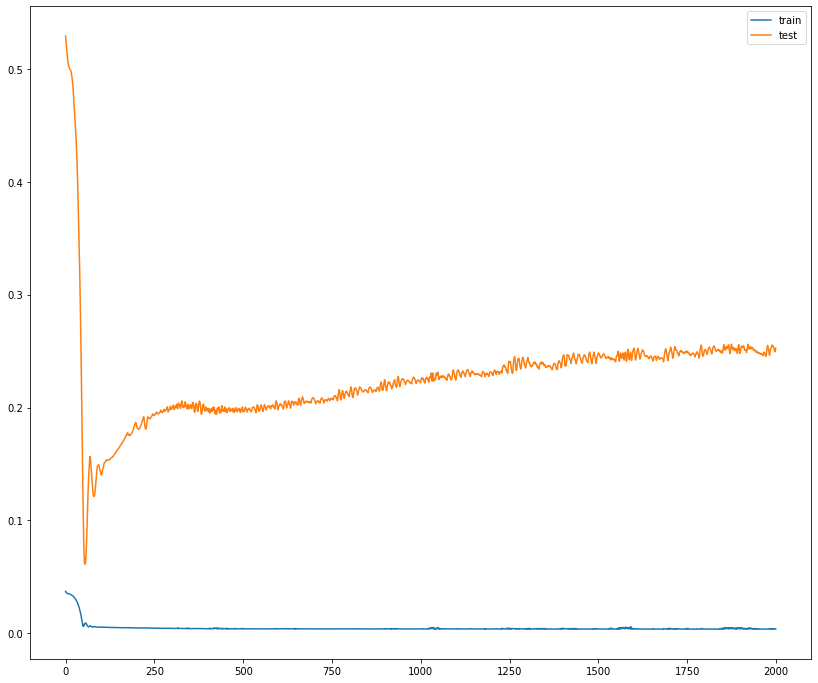

(36, 1, 11) (36,) (14, 11) (14,)


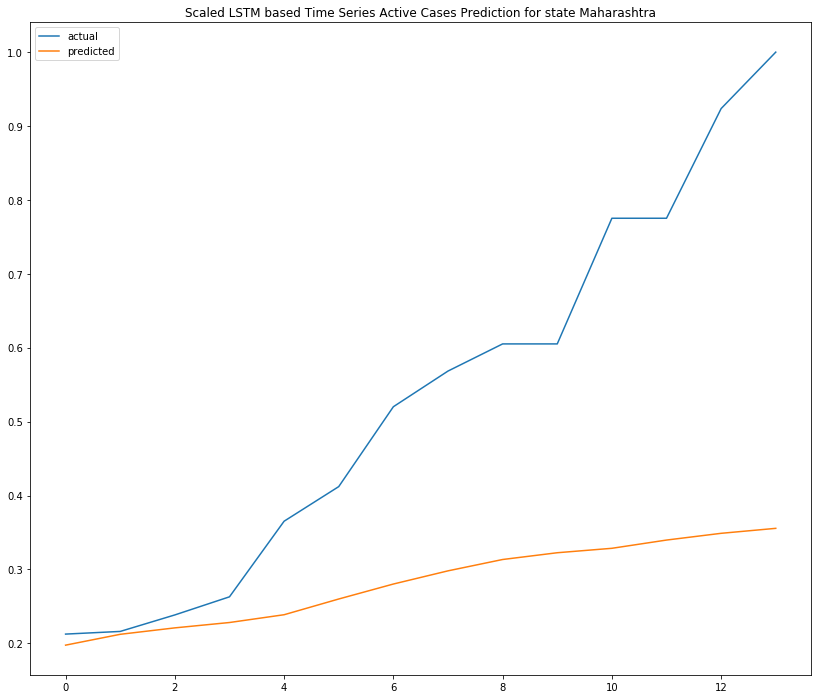

Test RMSE: 0.324
Test RMSE: 449.923


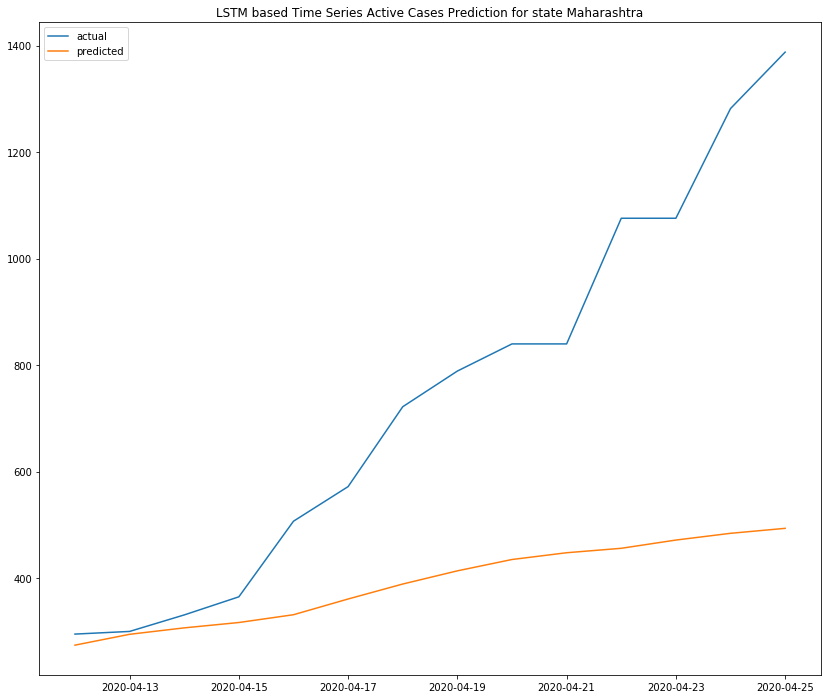

In [108]:
# convert series to supervised learning
def series_to_supervised_smoothing(data, n_in=1, n_out=1, dropnan=True):
    width = 2

    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        lag3 = df.shift(width-1)
        rwm = lag3.rolling(window=width)
        means = rwm.mean()

        cols.append(means)
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


dataset =df_state_recs[9]
dataset = dataset[['Cured/Discharged/Migrated', 'Death', 'Total Confirmed cases', 'LiteracyRate', 'PopulationDensity', 'ElderlyRate',
       'DistrictsEffected', 'NoRedZones', 'NoOrangeZones', 'NoGreenZones', 'Active Cases']]


no_features = 10

values = dataset.values
# ensure all data is float
values = values.astype('float32')
print(np.shape(values)[0])
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised_smoothing(scaled, 1, 1)
# drop columns we don't want to predict
print(np.shape(reframed))
#reframed.drop(reframed.columns[[9, 10, 11, 12, 13, 14, 15]], axis=1, inplace=True)
reframed.drop(reframed.columns[[12, 13, 14, 15, 16, 17, 18, 19, 20, 21]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
n_train_hours = int(df_per_State_features_lstm.shape[0]*0.70)
print(n_train_hours)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

print(np.shape(train))
print(np.shape(test))

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

print(train_X.shape[1], train_X.shape[2])


# design network
model = Sequential()

model.add(LSTM(units=50, return_sequences= True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=2000, batch_size=72, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)
# plot history
plt.figure(figsize=(14,12))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# make a prediction
y_predict = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


plt.figure(figsize=(14,12))
plt.plot(test_y, label='actual')
plt.plot(y_predict, label='predicted')
plt.title('Scaled LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()
rmse = np.sqrt(mean_squared_error(test_y, y_predict))
print('Test RMSE: %.3f' % rmse)


inv_y_predict = concatenate((y_predict, test_X[:, -(no_features):]), axis=1)

inv_y_predict = scaler.inverse_transform(inv_y_predict)
inv_y_predict = inv_y_predict[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_predict))
print('Test RMSE: %.3f' % rmse)

pred_len = len(inv_y_predict)
dateEnd = daterange[split_factor+1]
pred_index= pd.date_range(start=dateEnd, periods=pred_len, freq='D')

inv_y_actual =  pd.Series(inv_y, pred_index)
inv_y_predicted =  pd.Series(inv_y_predict, pred_index)

plt.figure(figsize=(14,12))
plt.plot(inv_y_actual, label='actual')
plt.plot(inv_y_predicted, label='predicted')
plt.title('LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()

# Prediction for Tamil Nadu (Expanding Window width 3) with limited Input features

54
(50, 22)
33
(33, 12)
(17, 12)
(33, 11) (33,) (17, 11) (17,)
(33, 1, 11) (33,) (17, 1, 11) (17,)
1 11
Train on 33 samples, validate on 17 samples
Epoch 1/1250
33/33 - 4s - loss: 0.0056 - val_loss: 0.4584
Epoch 2/1250
33/33 - 0s - loss: 0.0054 - val_loss: 0.4566
Epoch 3/1250
33/33 - 0s - loss: 0.0058 - val_loss: 0.4560
Epoch 4/1250
33/33 - 0s - loss: 0.0060 - val_loss: 0.4566
Epoch 5/1250
33/33 - 0s - loss: 0.0057 - val_loss: 0.4575
Epoch 6/1250
33/33 - 0s - loss: 0.0054 - val_loss: 0.4587
Epoch 7/1250
33/33 - 0s - loss: 0.0052 - val_loss: 0.4599
Epoch 8/1250
33/33 - 0s - loss: 0.0051 - val_loss: 0.4601
Epoch 9/1250
33/33 - 0s - loss: 0.0053 - val_loss: 0.4597
Epoch 10/1250
33/33 - 0s - loss: 0.0052 - val_loss: 0.4588
Epoch 11/1250
33/33 - 0s - loss: 0.0051 - val_loss: 0.4580
Epoch 12/1250
33/33 - 0s - loss: 0.0051 - val_loss: 0.4574
Epoch 13/1250
33/33 - 0s - loss: 0.0052 - val_loss: 0.4570
Epoch 14/1250
33/33 - 0s - loss: 0.0052 - val_loss: 0.4567
Epoch 15/1250
33/33 - 0s - loss: 0.

Epoch 137/1250
33/33 - 0s - loss: 0.0015 - val_loss: 0.3877
Epoch 138/1250
33/33 - 0s - loss: 0.0018 - val_loss: 0.3880
Epoch 139/1250
33/33 - 0s - loss: 0.0016 - val_loss: 0.3889
Epoch 140/1250
33/33 - 0s - loss: 0.0016 - val_loss: 0.3895
Epoch 141/1250
33/33 - 0s - loss: 0.0019 - val_loss: 0.3889
Epoch 142/1250
33/33 - 0s - loss: 0.0017 - val_loss: 0.3876
Epoch 143/1250
33/33 - 0s - loss: 0.0015 - val_loss: 0.3868
Epoch 144/1250
33/33 - 0s - loss: 0.0018 - val_loss: 0.3872
Epoch 145/1250
33/33 - 0s - loss: 0.0016 - val_loss: 0.3881
Epoch 146/1250
33/33 - 0s - loss: 0.0016 - val_loss: 0.3883
Epoch 147/1250
33/33 - 0s - loss: 0.0017 - val_loss: 0.3877
Epoch 148/1250
33/33 - 0s - loss: 0.0015 - val_loss: 0.3869
Epoch 149/1250
33/33 - 0s - loss: 0.0017 - val_loss: 0.3872
Epoch 150/1250
33/33 - 0s - loss: 0.0016 - val_loss: 0.3881
Epoch 151/1250
33/33 - 0s - loss: 0.0015 - val_loss: 0.3885
Epoch 152/1250
33/33 - 0s - loss: 0.0017 - val_loss: 0.3883
Epoch 153/1250
33/33 - 0s - loss: 0.0016

Epoch 274/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3744
Epoch 275/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3742
Epoch 276/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3739
Epoch 277/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3736
Epoch 278/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3731
Epoch 279/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3727
Epoch 280/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3723
Epoch 281/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3719
Epoch 282/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3715
Epoch 283/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3709
Epoch 284/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3710
Epoch 285/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3710
Epoch 286/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3709
Epoch 287/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3707
Epoch 288/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3703
Epoch 289/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3706
Epoch 290/1250
33/33 - 0s - loss: 0.0014

Epoch 411/1250
33/33 - 0s - loss: 0.0015 - val_loss: 0.3553
Epoch 412/1250
33/33 - 0s - loss: 0.0015 - val_loss: 0.3558
Epoch 413/1250
33/33 - 0s - loss: 0.0018 - val_loss: 0.3554
Epoch 414/1250
33/33 - 0s - loss: 0.0015 - val_loss: 0.3541
Epoch 415/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3539
Epoch 416/1250
33/33 - 0s - loss: 0.0015 - val_loss: 0.3555
Epoch 417/1250
33/33 - 0s - loss: 0.0013 - val_loss: 0.3567
Epoch 418/1250
33/33 - 0s - loss: 0.0017 - val_loss: 0.3570
Epoch 419/1250
33/33 - 0s - loss: 0.0016 - val_loss: 0.3564
Epoch 420/1250
33/33 - 0s - loss: 0.0013 - val_loss: 0.3559
Epoch 421/1250
33/33 - 0s - loss: 0.0017 - val_loss: 0.3565
Epoch 422/1250
33/33 - 0s - loss: 0.0015 - val_loss: 0.3579
Epoch 423/1250
33/33 - 0s - loss: 0.0013 - val_loss: 0.3585
Epoch 424/1250
33/33 - 0s - loss: 0.0015 - val_loss: 0.3574
Epoch 425/1250
33/33 - 0s - loss: 0.0013 - val_loss: 0.3562
Epoch 426/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3560
Epoch 427/1250
33/33 - 0s - loss: 0.0013

Epoch 548/1250
33/33 - 0s - loss: 0.0013 - val_loss: 0.3295
Epoch 549/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.3279
Epoch 550/1250
33/33 - 0s - loss: 0.0016 - val_loss: 0.3277
Epoch 551/1250
33/33 - 0s - loss: 0.0013 - val_loss: 0.3283
Epoch 552/1250
33/33 - 0s - loss: 0.0013 - val_loss: 0.3283
Epoch 553/1250
33/33 - 0s - loss: 0.0014 - val_loss: 0.3277
Epoch 554/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.3268
Epoch 555/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.3259
Epoch 556/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.3253
Epoch 557/1250
33/33 - 0s - loss: 0.0013 - val_loss: 0.3252
Epoch 558/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.3253
Epoch 559/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.3253
Epoch 560/1250
33/33 - 0s - loss: 0.0013 - val_loss: 0.3245
Epoch 561/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.3237
Epoch 562/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.3232
Epoch 563/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.3228
Epoch 564/1250
33/33 - 0s - loss: 0.0012

Epoch 685/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.2958
Epoch 686/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.2972
Epoch 687/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.2968
Epoch 688/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.2948
Epoch 689/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2927
Epoch 690/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2906
Epoch 691/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2883
Epoch 692/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2858
Epoch 693/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2830
Epoch 694/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2798
Epoch 695/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2764
Epoch 696/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2760
Epoch 697/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2780
Epoch 698/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2826
Epoch 699/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2867
Epoch 700/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.2904
Epoch 701/1250
33/33 - 0s - loss: 0.0011

Epoch 822/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2286
Epoch 823/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.2268
Epoch 824/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2250
Epoch 825/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.2211
Epoch 826/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.2170
Epoch 827/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.2122
Epoch 828/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2113
Epoch 829/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2139
Epoch 830/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2194
Epoch 831/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.2238
Epoch 832/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2254
Epoch 833/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2245
Epoch 834/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2214
Epoch 835/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2163
Epoch 836/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.2110
Epoch 837/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.2095
Epoch 838/1250
33/33 - 0s - loss: 0.0011

Epoch 959/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1570
Epoch 960/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.1574
Epoch 961/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1550
Epoch 962/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1498
Epoch 963/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.1409
Epoch 964/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1367
Epoch 965/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.1372
Epoch 966/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.1424
Epoch 967/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1487
Epoch 968/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1511
Epoch 969/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1500
Epoch 970/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1463
Epoch 971/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1452
Epoch 972/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1465
Epoch 973/1250
33/33 - 0s - loss: 9.9418e-04 - val_loss: 0.1492
Epoch 974/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1488
Epoch 975/1250
33/33 - 0s - loss: 0.

Epoch 1090/1250
33/33 - 0s - loss: 9.7432e-04 - val_loss: 0.1023
Epoch 1091/1250
33/33 - 0s - loss: 9.9401e-04 - val_loss: 0.1007
Epoch 1092/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1001
Epoch 1093/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1003
Epoch 1094/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1012
Epoch 1095/1250
33/33 - 0s - loss: 9.9846e-04 - val_loss: 0.1028
Epoch 1096/1250
33/33 - 0s - loss: 9.8262e-04 - val_loss: 0.1054
Epoch 1097/1250
33/33 - 0s - loss: 9.8961e-04 - val_loss: 0.1062
Epoch 1098/1250
33/33 - 0s - loss: 9.9766e-04 - val_loss: 0.1045
Epoch 1099/1250
33/33 - 0s - loss: 9.8225e-04 - val_loss: 0.1023
Epoch 1100/1250
33/33 - 0s - loss: 9.8689e-04 - val_loss: 0.1010
Epoch 1101/1250
33/33 - 0s - loss: 9.9813e-04 - val_loss: 0.1008
Epoch 1102/1250
33/33 - 0s - loss: 9.9732e-04 - val_loss: 0.1014
Epoch 1103/1250
33/33 - 0s - loss: 9.8951e-04 - val_loss: 0.1028
Epoch 1104/1250
33/33 - 0s - loss: 9.7545e-04 - val_loss: 0.1047
Epoch 1105/1250
33/33 - 0s - loss: 9.

Epoch 1221/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.0915
Epoch 1222/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.0903
Epoch 1223/1250
33/33 - 0s - loss: 0.0012 - val_loss: 0.0904
Epoch 1224/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.0909
Epoch 1225/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.0918
Epoch 1226/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.0932
Epoch 1227/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.0949
Epoch 1228/1250
33/33 - 0s - loss: 9.8731e-04 - val_loss: 0.0971
Epoch 1229/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1000
Epoch 1230/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.1013
Epoch 1231/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.1004
Epoch 1232/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.0977
Epoch 1233/1250
33/33 - 0s - loss: 9.7385e-04 - val_loss: 0.0940
Epoch 1234/1250
33/33 - 0s - loss: 9.9904e-04 - val_loss: 0.0912
Epoch 1235/1250
33/33 - 0s - loss: 0.0011 - val_loss: 0.0908
Epoch 1236/1250
33/33 - 0s - loss: 0.0010 - val_loss: 0.0909
Epoch 1237/1

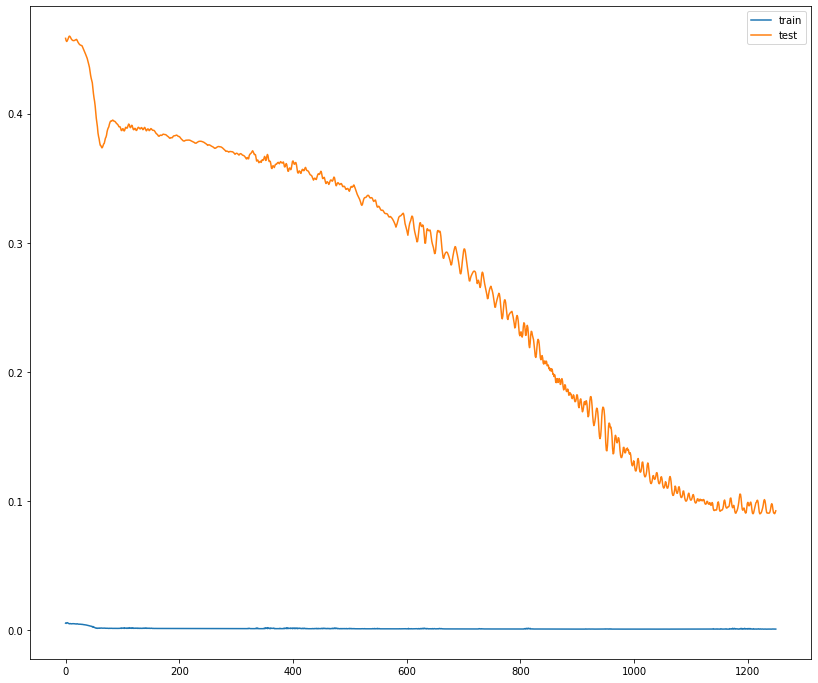

(33, 1, 11) (33,) (17, 11) (17,)


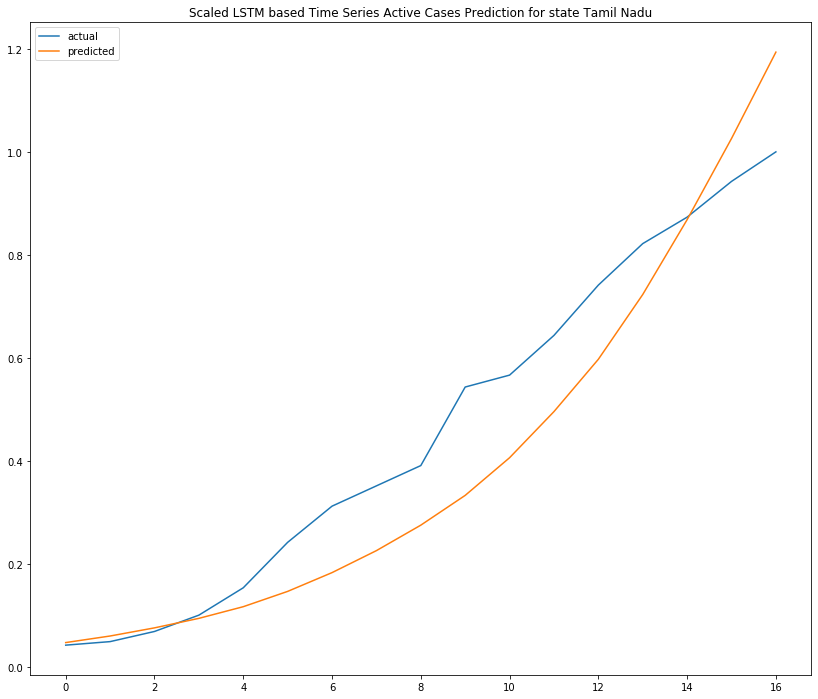

Test RMSE: 0.115
Test RMSE: 133.790
2020-04-12
17


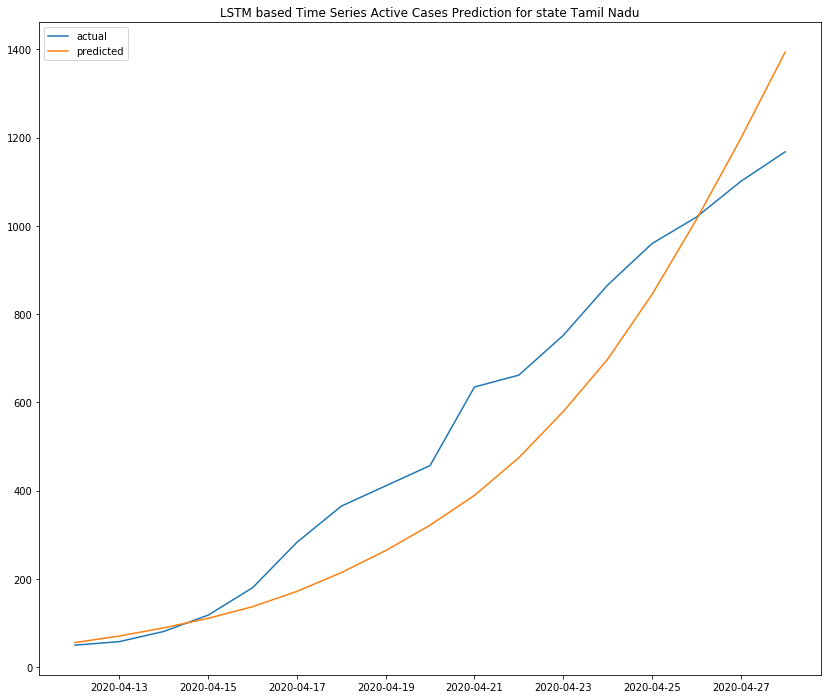

In [88]:
# convert series to supervised learning
def series_to_supervised_smoothing(data, n_in=1, n_out=1, dropnan=True):
    width = 3

    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        lag3 = df.shift(width-1)
        rwm = lag3.expanding(width)
        means = rwm.mean()

        cols.append(means)
        names += [('feature%d(ti-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('feature%d(ti)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('feature%d(ti+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


dataset =df_state_recs[6]
stateName = states[6]
dataset = dataset[['Cured/Discharged/Migrated', 'Death', 'Total Confirmed cases', 'LiteracyRate', 'PopulationDensity', 'ElderlyRate',
       'DistrictsEffected', 'NoRedZones', 'NoOrangeZones', 'NoGreenZones', 'Active Cases']]


no_features = 10

values = dataset.values

# ensure all data is float
values = values.astype('float32')
print(np.shape(values)[0])
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised_smoothing(scaled, 1, 1)
# drop columns we don't want to predict
print(np.shape(reframed))
#reframed.drop(reframed.columns[[9, 10, 11, 12, 13, 14, 15]], axis=1, inplace=True)
reframed.drop(reframed.columns[[12, 13, 14, 15, 16, 17, 18, 19, 20, 21]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
split_factor = int(df_per_State_features_lstm.shape[0]*0.65)
print(split_factor)
train = values[:split_factor, :]
test = values[split_factor:, :]

print(np.shape(train))
print(np.shape(test))

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

print(train_X.shape[1], train_X.shape[2])


# design network
model = Sequential()

model.add(LSTM(units=50, return_sequences= True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=1250, batch_size=72, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)
# plot history
plt.figure(figsize=(14,12))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# make a prediction
y_predict = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


plt.figure(figsize=(14,12))
plt.plot(test_y, label='actual')
plt.plot(y_predict, label='predicted')
plt.title('Scaled LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()
rmse = np.sqrt(mean_squared_error(test_y, y_predict))
print('Test RMSE: %.3f' % rmse)


inv_y_predict = concatenate((y_predict, test_X[:, -(no_features):]), axis=1)

inv_y_predict = scaler.inverse_transform(inv_y_predict)
inv_y_predict = inv_y_predict[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_predict))
print('Test RMSE: %.3f' % rmse)

pred_len = len(inv_y_predict)
dateEnd = daterange[split_factor+1]
pred_index= pd.date_range(start=dateEnd, periods=pred_len, freq='D')

inv_y_actual =  pd.Series(inv_y, pred_index)
inv_y_predicted =  pd.Series(inv_y_predict, pred_index)


plt.figure(figsize=(14,12))
plt.plot(inv_y_actual, label='actual')
plt.plot(inv_y_predicted, label='predicted')
plt.title('LSTM based Time Series Active Cases Prediction for state ' + stateName)
plt.legend()
plt.show()

In [82]:
print(pred_index)

DatetimeIndex(['2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
               '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
               '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
               '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19',
               '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23',
               '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27',
               '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31',
               '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
               '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08',
               '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
               '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16',
               '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20'],
              dtype='datetime64[ns]', freq='D')
